# Results Advanced

Coba result objects containa number of useful features to make quick analysis easier. Here we cover some of those features.

## 1. Working with Results that have Missing Evaluations

Here we create a result that is missing any interactions evaluating env1 on lrn1:

In [1]:
import coba as cb

env0 = cb.Environments.from_linear_synthetic(100,seed=1)[0]
env1 = cb.Environments.from_linear_synthetic(100,seed=2)[0]
lrn0 = cb.RandomLearner()
lrn1 = cb.RandomLearner()

result = cb.Experiment([(env0,lrn0),(env1,lrn0),(env0,lrn1)]).run(quiet=True)

### Analysis
After creating our result we can print it to see that it has all of our learners and environemnts

In [2]:
print(result)

{'Learners': 2, 'Environments': 2, 'Interactions': 400}


However, when we ask it to plot we receive a notification in addition to the plot:

`We removed 1 environment_id because it did not exist for every full_name.
`

We removed 1 environment_id because it did not exist for every full_name.


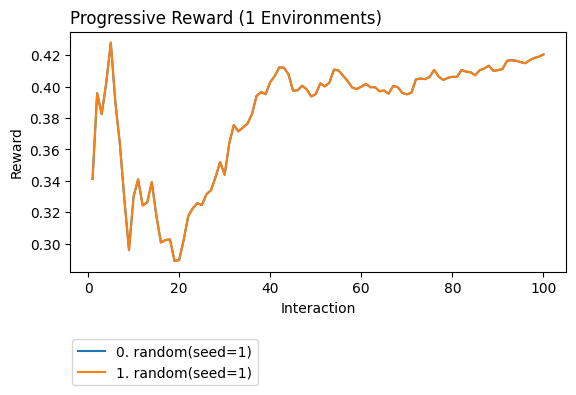

In [13]:
result.plot_learners()

When we ask Coba to plot a result it checks and makes sure all plotted learners have the same environments completed. If this is not the case then coba removes the environments that aren't completed by all learners before plotting. We can disable this functionality by setting `p=None`. We see below that even though the two learners are identical we now get different plotted results due to learner 0 showing the average performance across two environments.

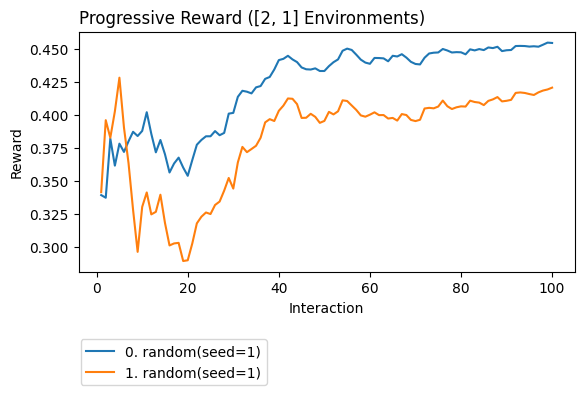

In [12]:
result.plot_learners(p=None)

Alternatively, we could also remove learner 1 from result to see learner 0 performance on environments.

Removing learner 1 means that all learners (now only learner 0) are completed for all environments (environment 0 and 1).

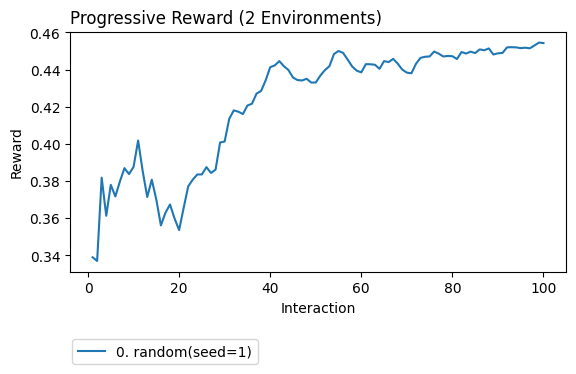

In [4]:
result.where(learner_id=0).plot_learners()

Finally, we can filter to equally completed evaluations by using `where_fin(l,p)` (short for where_finished). 

Coba will remove all `p` from the result where one `l` does not exist for every `p`.

The variable `p` is short hand for pairings. That is, on what variables `p` do we want to "pair" `l`.

In [14]:
result = result.where_fin(l='learner_id',p='environment_id')

We removed 1 environment_id because it did not exist for every learner_id.


## 2. Working with Results that have Evaluations of different Lengths

Here we create a result with one environment made up of 100 interactions and one environment with 200 interactions:

In [32]:
import coba as cb

env0 = cb.Environments.from_linear_synthetic(100,seed=1)[0]
env1 = cb.Environments.from_linear_synthetic(200,seed=2)[0]
lrn0 = cb.RandomLearner()
lrn1 = cb.RandomLearner()

result = cb.Experiment([env0,env1],[lrn0,lrn1]).run(quiet=True)

### Analysis
After creating our result we can print it to see that it has all of our learners and environemnts and interactions

In [18]:
print(result)

{'Learners': 2, 'Environments': 2, 'Interactions': 600}


When we ask Coba to plot we receive a notification in addition to the plot:

`We shortened 2 learner evaluations because they were longer than the shortest environment`

We shortened 2 learner evaluations because they were longer than the shortest environment.


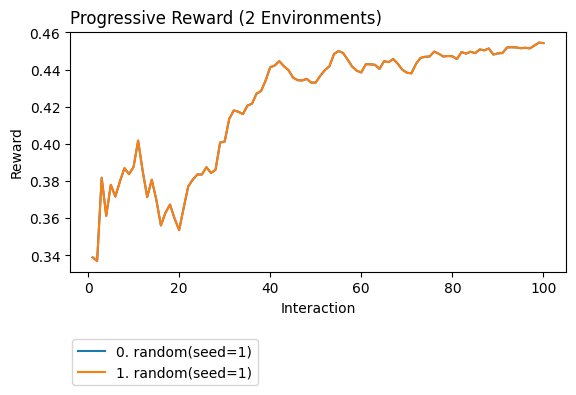

In [19]:
result.plot_learners()

This is similar to the missing environment use case except now we have indexes that only exist in specific environments.

Once again we can force this constraint to be ignored by setting `p=None`. 

When we do this we see a sudden and drastic change at x=100 due to the data from 100-200 only coming from a single environment. 

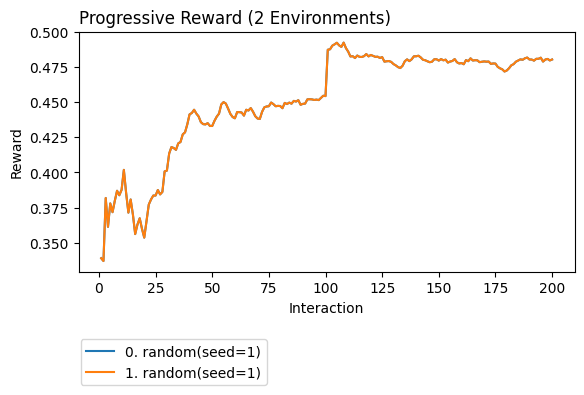

In [20]:
result.plot_learners(p=None)

A better way to fix this problem is to either explicitly remove short environments or use `where_fin(n_interactions)`.

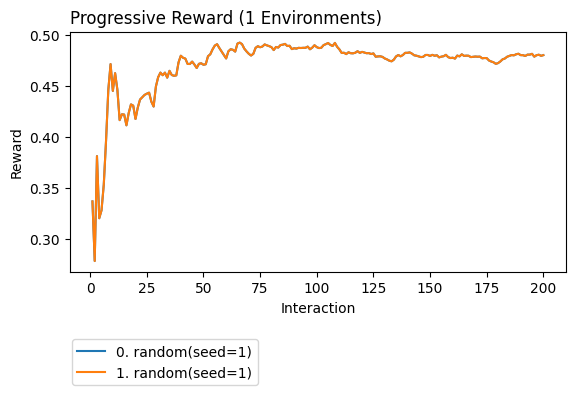

We removed 2 learner evaluations because they were shorter than 200 interactions.


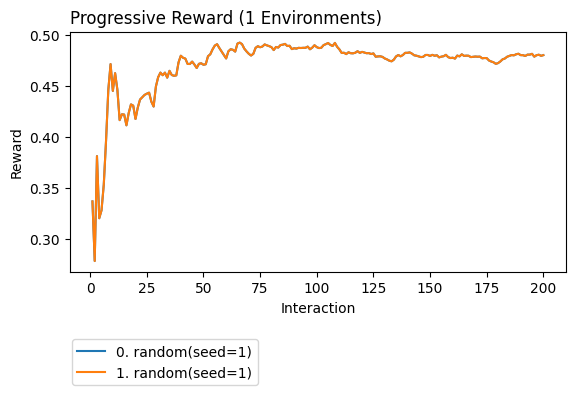

In [26]:
result.where(environment_id=1).plot_learners()
result.where_fin(200).plot_learners()

When using `where_fin(n_interactions)` coba will remove environments that don't contain at least `n_interactions` and drop interactions from environments with more than `n_interactions`. Notice below that after applying `where_fin(150)` our result now only has 300 interactions (i.e., 150 from each of the environment 1 evaluations).

In [30]:
result.where_fin(150)

We removed 2 learner evaluations because they were shorter than 150 interactions.
We shortened 2 learner evaluations because they were longer than the shortest environment.
{'Learners': 2, 'Environments': 1, 'Interactions': 300}


## 3. Plotting by different variables
Often we are interested in performance with respect to specific variables. 

Here we create two environments with different numbers of actions so we can see how a learner performs with respect to action count.

In [1]:
import coba as cb

env0 = cb.Environments.from_linear_synthetic(100,n_actions=2,seed=1).binary().shuffle(n=5)
env1 = cb.Environments.from_linear_synthetic(100,n_actions=5,seed=2).binary().shuffle(n=5)
lrn0 = cb.RandomLearner()

result = cb.Experiment(env0+env1,lrn0).run(quiet=True)

We can look at the environments table to see what variables we could plot on and we see `n_actions`.

In [15]:
result.environments.to_pandas()

,environment_id,binary,env_type,n_actions,n_coeff,reward_features,seed,shuffle
0,0,True,LinearSynthetic,2,5,"[a, xa]",1,0
1,1,True,LinearSynthetic,2,5,"[a, xa]",1,1
2,2,True,LinearSynthetic,2,5,"[a, xa]",1,2
3,3,True,LinearSynthetic,2,5,"[a, xa]",1,3
4,4,True,LinearSynthetic,2,5,"[a, xa]",1,4
5,5,True,LinearSynthetic,5,5,"[a, xa]",2,0
6,6,True,LinearSynthetic,5,5,"[a, xa]",2,1
7,7,True,LinearSynthetic,5,5,"[a, xa]",2,2
8,8,True,LinearSynthetic,5,5,"[a, xa]",2,3
9,9,True,LinearSynthetic,5,5,"[a, xa]",2,4


Based on this we can set the plot's label to `l='n_actions'` and set `p=None` so that coba doesn't try to remove missing environments

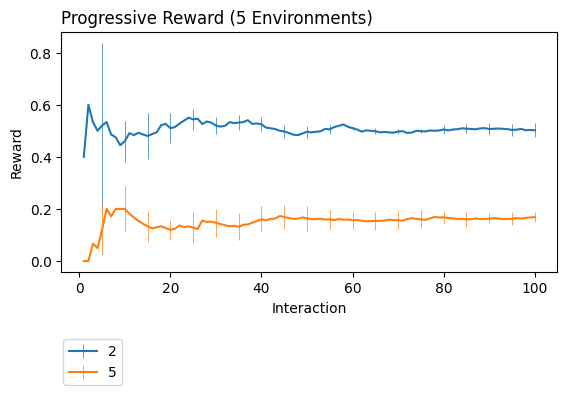

In [4]:
result.plot_learners(l='n_actions',p=None,err='se')

We could set the x-axis to `n_actions` as well which collapses down to the right-most reward value

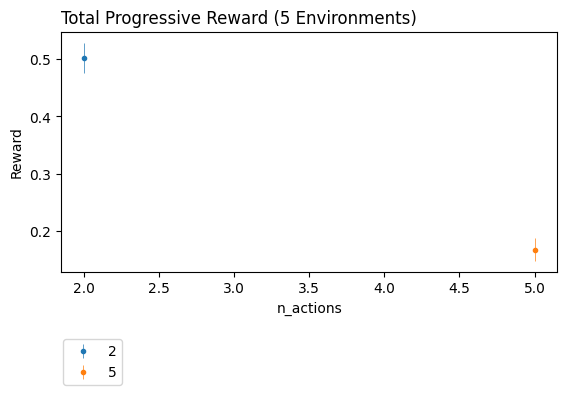

In [3]:
result.plot_learners(x='n_actions',l='n_actions',p=None,err='se')

It also possible to create plots with respect to collections of variables across`environments`, `learners`, `evaluators` and `interactions`.

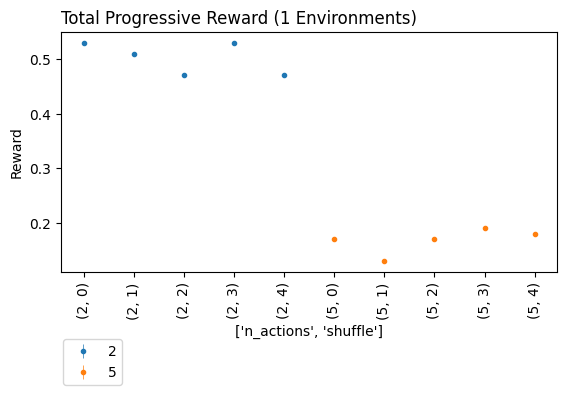

In [8]:
result.plot_learners(x=['n_actions','shuffle'],l='n_actions', p= None,err='se')

## 4. Overlaying Result Plots

It is possible to overlay multiple plots generated by the same result or separate results. Here we make a quick result.

In [2]:
import coba as cb
env0 = cb.Environments.from_linear_synthetic(100,n_actions=5,seed=1).binary().shuffle(n=16)
lrn0 = cb.RandomLearner()
result = cb.Experiment(env0,lrn0).run(quiet=True)

To overlay plots we tell coba to not output the plot by passing in `plot_learners(out=None)`.

Once we've done that we can call result again to generate a second plot that we overlay.

Below we overlay the standard error on top of the standard deviation around the mean.

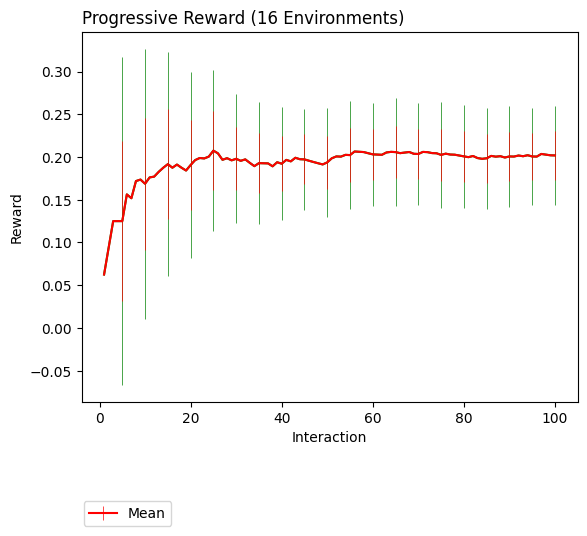

In [6]:
result.plot_learners(l='learner_id',p= None, colors="green", labels=''    , err='sd', out=None)
result.plot_learners(l='learner_id',p= None, colors="red"  , labels='Mean', err='se', out=None)

And here we overlay a learner's overall mean performance on top of the underlying evaluations.

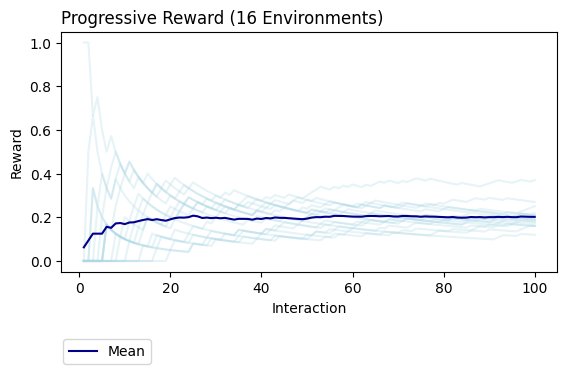

In [19]:
result.plot_learners(l='shuffle'   ,p= None, colors="#ADD8E6", labels=''    , alpha=.3, out=None)
result.plot_learners(l='learner_id',p= None, colors="#00008B", labels='Mean'                    )